In [200]:
#import some packages you will be using
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model, metrics

In [201]:
get_ipython().magic(u'matplotlib inline')
 
#set some options for the output
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)


In [202]:
#read in the datasets
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
#print(train)
#A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
print(train.shape)

(2039, 81)


In [203]:
pd.set_option('display.max_rows', -1)
train.isnull().sum()

                    0
subclass            0
zoning            325
lotfrontage         0
lotarea             0
street           1893
alley               0
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodel         0
roofstyle           0
roofmat             0
exterior1           0
exterior2          15
masvnrtype         15
masvnrarea          0
exterqual           0
extercond           0
foundation         54
bsmtqual           54
bsmtcond           56
bsmtexposure       54
bsmtfintype1        1
bsmtfinsf1         54
bsmtfintype2        1
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         0
heating             0
heatingqc           0
centralair          1
electrical          0
firstflrsf          0
secondflrsf         0
lowqualfin

In [204]:
corr = train[train.columns].corr()
#print(corr)
#sns.heatmap(corr, annot = True)
print(corr['saleprice'].sort_values(ascending=False))
corr.to_csv('traincorrelations.csv') 

                 1.000000
saleprice        0.799837
overallqual      0.701734
grlivarea        0.651208
garagecars       0.645954
garagearea       0.633116
firstflrsf       0.631554
totalbsmtsf      0.557469
yearbuilt        0.536306
fullbath         0.522784
yearremodel      0.509407
garageyrblt      0.504192
masvnrarea       0.489947
totrmsabvgrd     0.487527
fireplaces       0.446593
bsmtfinsf1       0.362590
lotfrontage      0.336688
wooddecksf       0.308081
openporchsf      0.290127
bsmtfullbath     0.286912
halfbath         0.262951
lotarea          0.249058
secondflrsf      0.155935
bsmtunfsf        0.128759
bedroomabvgr     0.099817
screenporch      0.081070
poolarea         0.031991
mosold           0.018977
bsmtfinsf2       0.015316
threessnporch   -0.010446
index           -0.015998
miscval         -0.024561
yrsold          -0.038653
lowqualfinsf    -0.044365
bsmthalfbath    -0.073554
subclass        -0.109245
overallcond     -0.109632
kitchenabvgr     0.799837
overallqual 

In [137]:
#Using Normal Sale types, elminating outliars for GR area
ntrain = train
ntrain = ntrain[ntrain["salecondition"] == 'Normal']
ntrain = ntrain[ntrain["grlivarea"] <= 3627]
ntrain.to_csv('ntrain.csv')

In [184]:
newtrain_2 = ntrain
newtrain_2['totalsf'] = (newtrain_2['totalbsmtsf']+newtrain_2['grlivarea'])
newtrain_2.describe
#newtrain_2 = newtrain_2[newtrain_2['totalsf'] < 6000]
newtrain_3 = newtrain_2
#newtrain_3 = newtrain_3[newtrain_2['saleprice'] <= 500000]
newtest_2 = test
newtest_2["garagearea"] = newtest_2['garagearea'].fillna(0)
newtest_2['totalsf'] = (newtest_2['totalbsmtsf']+newtest_2['grlivarea'])


In [185]:
corr = train[train.columns].corr()
#print(corr)
#sns.heatmap(corr, annot = True)
corr.to_csv('traincorrelations.csv') 

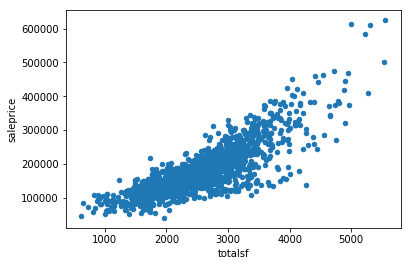

In [186]:
newtrain_3.plot.scatter(y='saleprice', x='totalsf', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [187]:
#Run a simple model
model = smf.ols(formula='saleprice ~ totalsf' , data=newtrain_3).fit()  
  
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3767.
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:15:39   Log-Likelihood:                -20114.
No. Observations:                1678   AIC:                         4.023e+04
Df Residuals:                    1676   BIC:                         4.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.379e+04   3357.526     -7.085      0.0

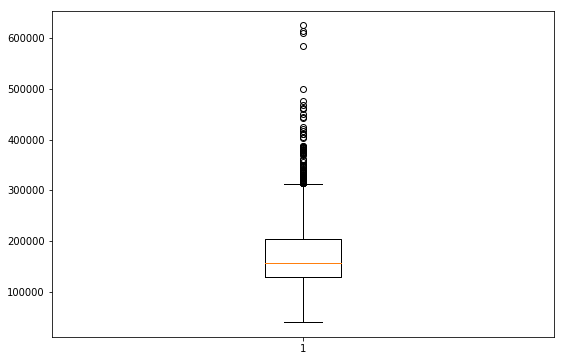

In [188]:
data_to_plot = newtrain_2['saleprice']
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [189]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions_9 = model.predict(newtest_2)
print(test_predictions_9)
d_2 = {'p_saleprice': test_predictions_9}
df3 = newtest_2[['index']]
df4 = pd.DataFrame(data=d_2)
your_file = pd.concat([df3,df4],axis = 1, join_axes=[df3.index])
print(your_file)
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
your_file.to_csv('LoganStrouse_predict_totalsf.csv') 

0       34495.317085
1      269785.453582
2      189916.324679
3      217978.451050
4      186638.412482
           ...      
721    229011.423812
722    332945.225186
723    162333.892776
724    214940.386087
725    154658.781290
Length: 726, dtype: float64
     index    p_saleprice
0        1   34495.317085
1        4  269785.453582
2        7  189916.324679
3       11  217978.451050
4       13  186638.412482
..     ...            ...
721   2912  229011.423812
722   2914  332945.225186
723   2919  162333.892776
724   2923  214940.386087
725   2924  154658.781290

[726 rows x 2 columns]
